# Zero Shot Instance Segmentation

<ul> Notebook Outline
  <li>Load OpenAI's CLIP and Meta's SAM Models</li>
  <li>Generate masks from SAM model</li>
  <li>Create overlay image with SAM output and CLIP model</li>
</ul>

In [1]:
from segment_anything import SamAutomaticMaskGenerator, SamPredictor
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image, ImageDraw
import clip, os, torch, cv2, numpy as np, urllib.request, matplotlib.pyplot as plt, IPython
from collections import OrderedDict
import matplotlib.patches as mpatches, selectivesearch, IPython
from utils.utils import * 
from SAMCLIPInstanceSegmentation import *

## Load OpenAI's CLIP and Meta's SAM Models

In [2]:
samclip = SAMCLIPInstanceSegmentation()

In [3]:
samclip.load_set_clip("ViT-B/32")
samclip.load_set_sam("model/sam_vit_h_4b8939.pth")

##### Let's See this Adorable Sample Image

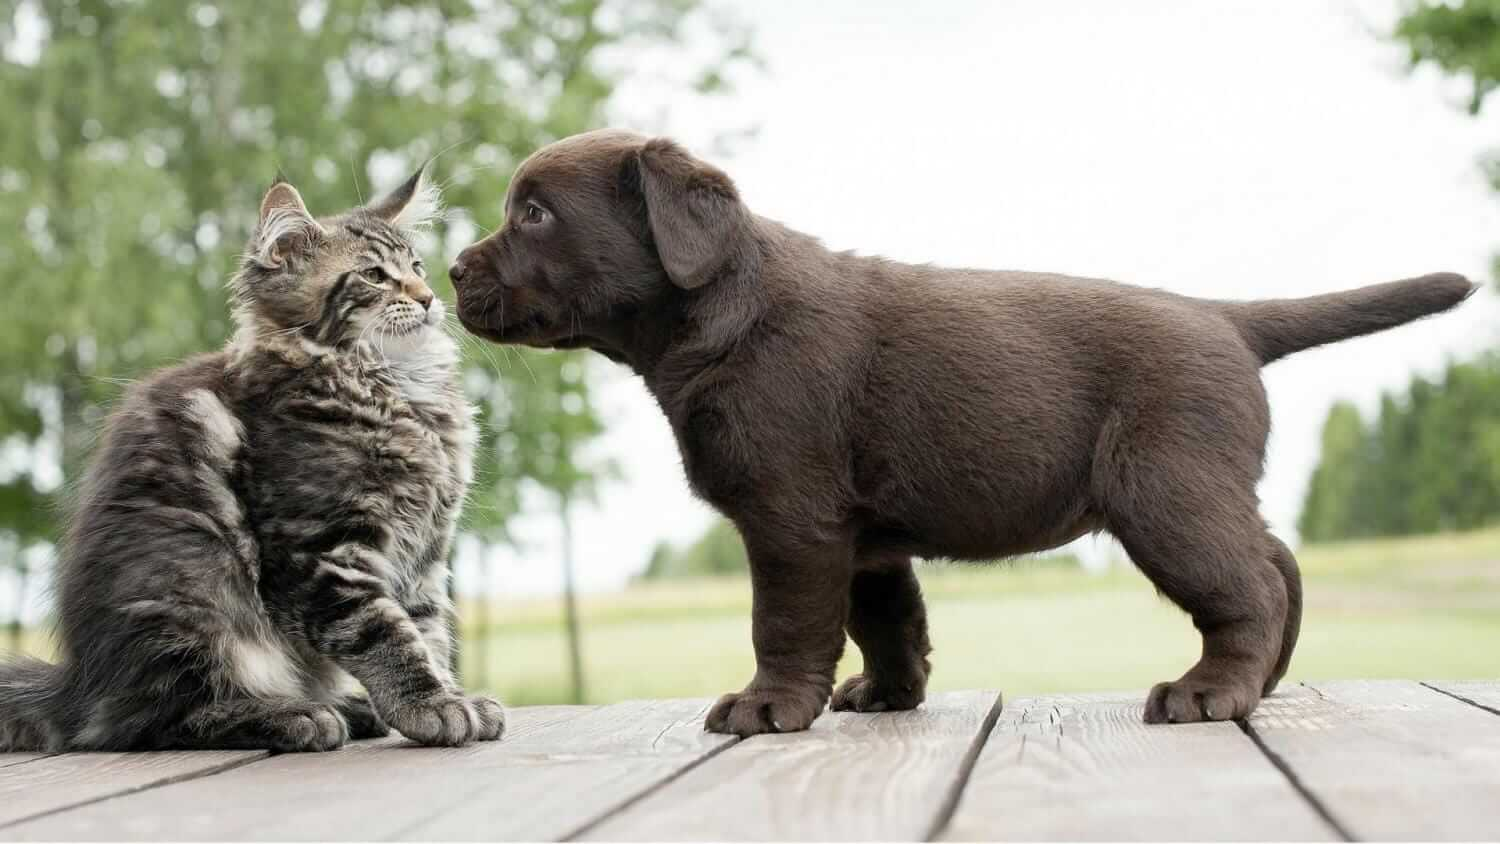

In [4]:
img_pth = "images/cat_dog.jpg"  
IPython.display.Image(filename=img_pth, height=300, width= 600)

## Generate Masks from SAM

In [5]:
img_pth = "images/cat_dog.jpg"  # TODO should display image
sam_masks = samclip.generate_image_sam_mask(img_pth)

## Create overlay image with SAM output and CLIP model

In [6]:
classes = ["dog", "cat"]
overlayed_img = samclip.get_overlay_img(sam_masks, classes)
overlay_pth = "overlays/test_dog_cat.jpg"
cv2.imwrite(overlay_pth, overlayed_img)

True

#### Model confirms this is a dog and a cat interacting, this is what it is all about folks

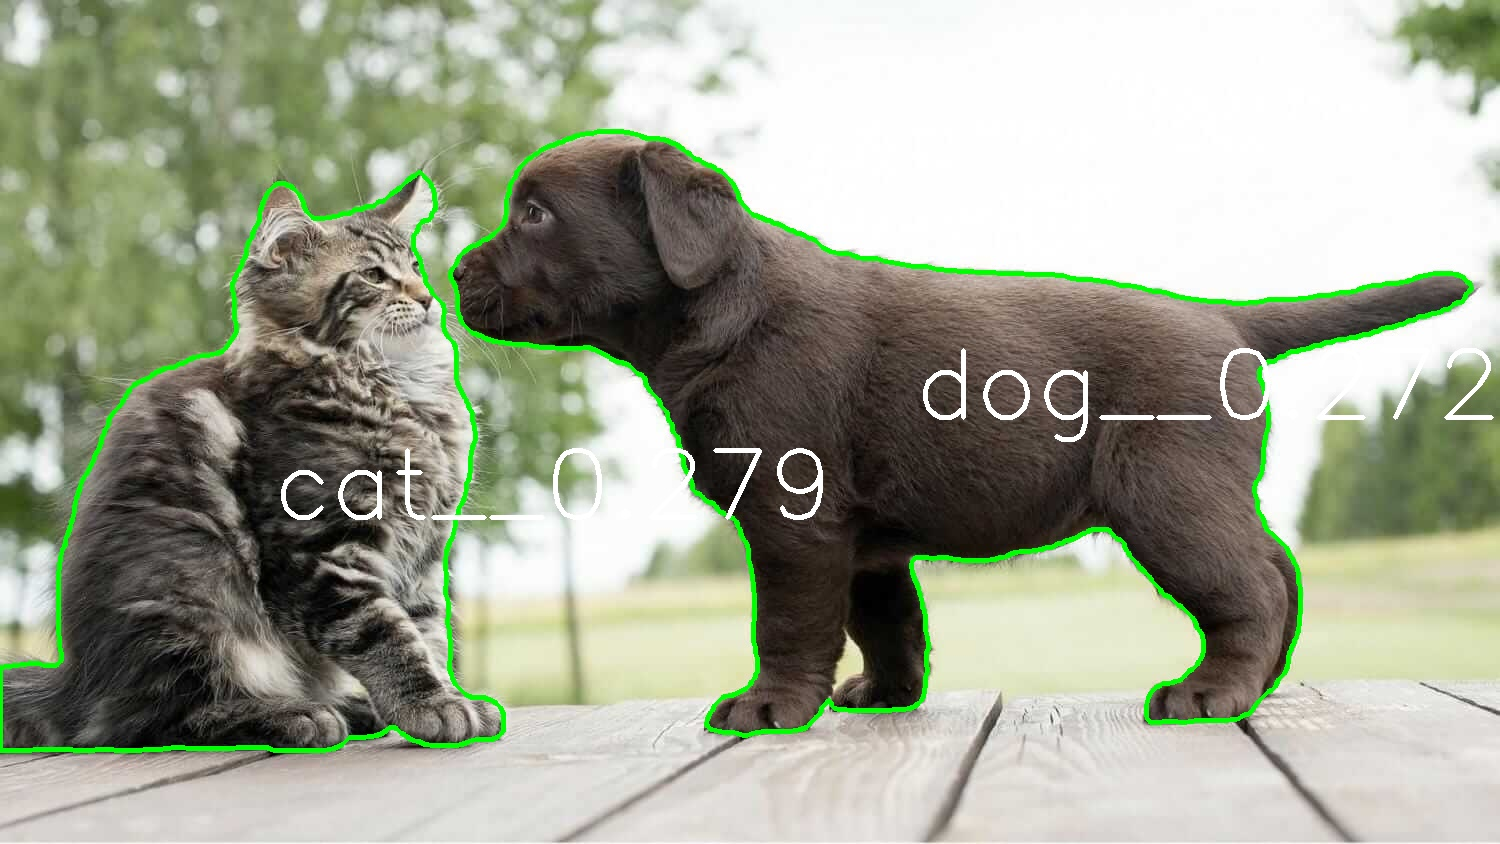

In [7]:
IPython.display.Image(filename=overlay_pth)